MICRO PROJECT


Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Load data
data = pd.read_csv("/content/hepaTITIS NEW - Sheet1.csv")
data


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [ ]:
import plotly.express as px
fig = px.histogram(data)

fig.show()

In [ ]:
fig = px.box(data)

fig.show()

In [ ]:
#Data afetr dropping the outliers
def drop_outliers_IQR(data):

   q1=data.quantile(0.25)

   q3=data.quantile(0.75)

   IQR=q3-q1

   not_outliers = data[~((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,61.852273,0,1
1,50,0,0,0,2,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,61.852273,0,1
2,78,0,2,0,2,0,0,2,0,0,0,0,0,0.7,96.000000,32.0,4.0,61.852273,0,1
3,31,0,1,1,0,0,0,2,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,1
4,34,0,2,0,0,0,0,2,0,0,0,0,0,1.0,105.325397,200.0,4.0,61.852273,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,2,0,2,2,2,2,0,0,2,2,2,7.6,105.325397,242.0,3.3,50.000000,1,0
151,44,0,2,0,2,0,0,2,2,0,0,0,0,0.9,126.000000,142.0,4.3,61.852273,1,1
152,61,0,0,0,2,2,0,0,2,0,2,0,0,0.8,75.000000,20.0,4.1,61.852273,1,1
153,53,1,0,0,2,0,0,2,0,2,2,0,2,1.5,81.000000,19.0,4.1,48.000000,1,1


In [ ]:
# Find the mean
data.isna().mean()

age                0.000000
sex                0.000000
steroid            0.006452
antivirals         0.000000
fatigue            0.006452
malaise            0.006452
anorexia           0.006452
liver_big          0.064516
liver_firm         0.070968
spleen_palpable    0.032258
spiders            0.032258
ascites            0.032258
varices            0.032258
bilirubin          0.038710
alk_phosphate      0.187097
sgot               0.025806
albumin            0.103226
protime            0.432258
histology          0.000000
class              0.000000
dtype: float64

In [ ]:
# replace the missing values with the mean
data.fillna(data.mean(), inplace=True)
data



<ipython-input-23-10fb5ceba7c4>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.000000,18.0,4.0,61.852273,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.000000,42.0,3.5,61.852273,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.000000,32.0,4.0,61.852273,False,live
3,31,female,0.506494,True,False,False,False,True,False,False,False,False,False,0.7,46.000000,52.0,4.0,80.000000,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,105.325397,200.0,4.0,61.852273,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,105.325397,242.0,3.3,50.000000,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.000000,142.0,4.3,61.852273,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.000000,20.0,4.1,61.852273,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.000000,19.0,4.1,48.000000,True,live


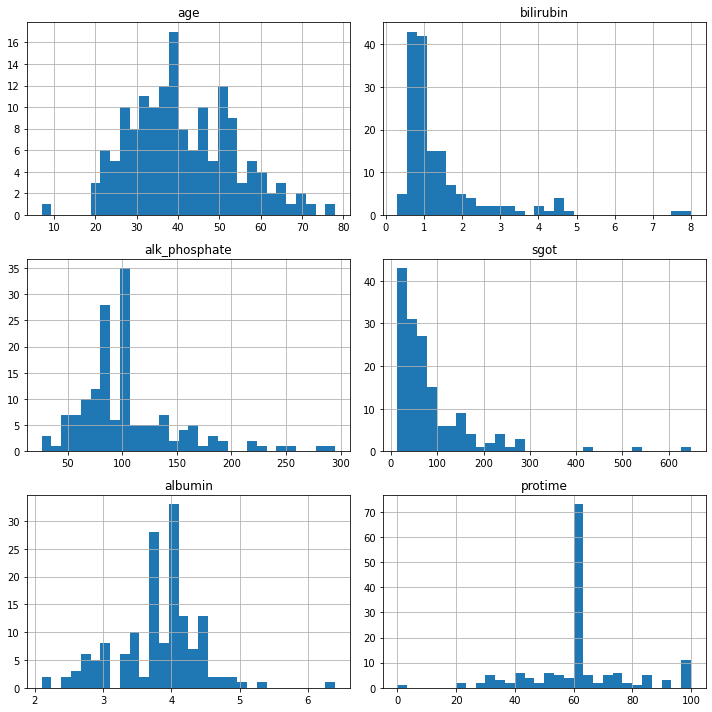

In [ ]:
# Plot histograms for each column
data.hist(bins=30, figsize=(10,10))
plt.tight_layout()
plt.show()

CLUSTERING USING KMEANS

In [ ]:

# Label encoding for 'sex' column
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['class'] = le.fit_transform(data['class'])
data["steroid"] = le.fit_transform(data["steroid"])
data["antivirals"] = le.fit_transform(data["antivirals"])
data["fatigue"] = le.fit_transform(data["fatigue"])
data["malaise"] = le.fit_transform(data["malaise"])
data["anorexia"] = le.fit_transform(data["anorexia"])
data["liver_big"] = le.fit_transform(data["liver_big"])
data["liver_firm"] = le.fit_transform(data["liver_firm"])
data["spleen_palpable"] = le.fit_transform(data["spleen_palpable"])
data["spiders"] = le.fit_transform(data["spiders"])
data["ascites"] = le.fit_transform(data["ascites"])
data["varices"] = le.fit_transform(data["varices"])
data["histology"] = le.fit_transform(data["histology"])


In [ ]:

# Normalizing data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

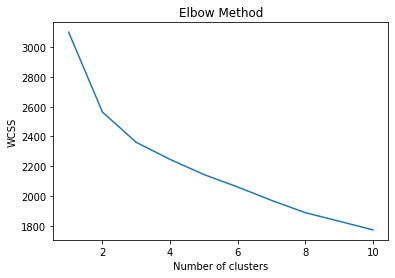

In [ ]:
# Elbow method for finding optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Select the relevant features
features = ['age', 'bilirubin', 'alk_phosphate', 'sgot','albumin','protime']
X = pd.DataFrame(data[features].values)


# Clustering using KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_scaled)
# Print the cluster labels
kmeans = KMeans(n_clusters=2)
y_kmeans=kmeans.fit_predict(X)

cluster_labels = kmeans.labels_
cluster_labels



array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0], dtype=int32)

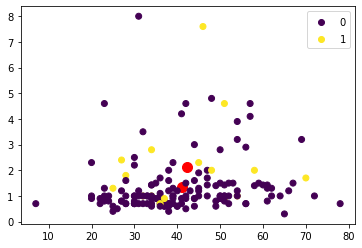

In [ ]:

# Perform KMeans clustering

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

cluster_labels = kmeans.labels_
cluster_labels
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
sc = plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans)
plt.legend(*sc.legend_elements())
plt.show()
